<a href="https://colab.research.google.com/github/lgr3qa/Class/blob/main/Copy_of_Lab_FTX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DS1002 Lab 1:  FTX

### Due Monday 1 April at noon

In this lab you will work with a dataset, writing python to generate the deliverables specified in the cells below.

> **FTX** was a cryptocurrency exchange founded by Sam Bankman-Fried that saw both a spectacular rise and collapse between 2021 and 2022. At one point it had a valuation of $32B. In November Bankman-Fried was found guilty on seven counts of fraud and conspiracy.  His sentencing hearing is today.

The dataset for this assignment covers that rise and fall from the viewpoint of daily stock closing prices for FTX (ticker symbol `FTT`).

Answer the questions below with the appropriate Python code.

**Put code and outputs in this notebook.**


## Group Submissions

As usual you may work in a group to complete this lab, with no more than 3 members in a group. Group members should be indicated in the cell below -- list both names and UVA computing IDs.

Each student should then submit **the same URL** for the lab in Canvas. (If a group has Member1, Member2, and Member3, only one member needs to save the completed work back to GitHub and all members should submit that URL for grading.)

In [37]:
# Kyoka Trepka kjt7mq
# lorenzo Romulo

## 1. Load Libraries & Data

https://s3.amazonaws.com/ds1002-resources/data/ftx-2021-01-01--2023-12-31.csv

Import any necessary libraries and load the remote CSV file below into a DataFrame. **Resolve any import issues you need to.**

In [38]:
import pandas as pd
csv_url = 'https://s3.amazonaws.com/ds1002-resources/data/ftx-2021-01-01--2023-12-31.csv'
df = pd.read_csv(csv_url, delimiter=";")
df.head()


,timeOpen,timeClose,timeHigh,timeLow,open,high,low,close,volume,marketCap,timestamp
0,2022-12-31T00:00:00.000Z,2022-12-31T23:59:59.999Z,2022-12-31T15:23:00.000Z,2022-12-31T00:21:00.000Z,0.838968,0.853502,0.835226,0.842688,3001502.06,2.771561e+08,2022-12-31T23:59:59.999Z
1,2022-12-30T00:00:00.000Z,2022-12-30T23:59:59.999Z,2022-12-30T04:22:00.000Z,2022-12-30T15:12:00.000Z,0.860193,0.864752,0.826643,0.839048,3608615.07,2.759588e+08,2022-12-30T23:59:59.999Z
2,2022-12-29T00:00:00.000Z,2022-12-29T23:59:59.999Z,2022-12-29T00:49:00.000Z,2022-12-29T21:03:00.000Z,0.885723,0.887118,0.843029,0.860231,3766979.57,2.829258e+08,2022-12-29T23:59:59.999Z
3,2022-12-28T00:00:00.000Z,2022-12-28T23:59:59.999Z,2022-12-28T00:20:00.000Z,2022-12-28T10:44:00.000Z,0.921162,0.925702,0.869842,0.886091,4192949.85,2.914310e+08,2022-12-28T23:59:59.999Z
4,2022-12-27T00:00:00.000Z,2022-12-27T23:59:59.999Z,2022-12-27T14:19:00.000Z,2022-12-27T19:12:00.000Z,0.931138,0.955402,0.916414,0.923668,4574953.05,3.037898e+08,2022-12-27T23:59:59.999Z


## 2. Get Summary Data

In code, display how many rows and columns are in the raw dataset.

In [39]:
number_of_rows, number_of_columns = df.shape
print('number of rows are', number_of_rows)
print('number of columns are', number_of_columns)

number of rows are 741
number of columns are 11


## 3. Clean and Organize the Data

Check for data quality.

- Resolve any empty values or duplicate rows.
- Order the data properly if necessary.
- Drop the following columns and save the dataframe: `timeOpen`, `timeClose`, `timeHigh`, `timeLow`, `marketCap`



In [40]:
print(df.columns)

Index(['timeOpen', 'timeClose', 'timeHigh', 'timeLow', 'open', 'high', 'low',
       'close', 'volume', 'marketCap', 'timestamp'],
      dtype='object')


In [41]:
df = df.drop_duplicates()
df = df.dropna()
columns_to_drop = ['timeOpen', 'timeClose', 'timeHigh', 'timeLow', 'marketCap']
df = df.drop(columns=columns_to_drop)

Now display the first 10 rows of the cleaned dataset.

In [42]:
df.head(10)

,open,high,low,close,volume,timestamp
0,0.838968,0.853502,0.835226,0.842688,3001502.06,2022-12-31T23:59:59.999Z
1,0.860193,0.864752,0.826643,0.839048,3608615.07,2022-12-30T23:59:59.999Z
2,0.885723,0.887118,0.843029,0.860231,3766979.57,2022-12-29T23:59:59.999Z
3,0.921162,0.925702,0.869842,0.886091,4192949.85,2022-12-28T23:59:59.999Z
4,0.931138,0.955402,0.916414,0.923668,4574953.05,2022-12-27T23:59:59.999Z
5,0.894567,1.011183,0.893652,0.930696,7065306.21,2022-12-26T23:59:59.999Z
6,0.924432,0.935517,0.894370,0.894657,2577834.83,2022-12-25T23:59:59.999Z
7,0.957505,0.975671,0.921085,0.924433,5055004.16,2022-12-24T23:59:59.999Z
8,1.027133,1.038282,0.948058,0.957006,17088962.94,2022-12-23T23:59:59.999Z
9,0.873973,1.127198,0.835625,1.027162,22418556.51,2022-12-22T23:59:59.999Z


## 4. Calculate Daily Gains/Losses

Using Pandas, add a new column named `["close_change"]` to the dataframe that calculates the difference between daily closing prices for FTX. This will result in positive (growth) and negative (loss) values.

Note:
- Be careful about how you calculate this. Each row should calculate that difference from the row above it, which must be the previous calendar day.
- Hint: This is not complicated and does not require a for-loop.  See the Pandas review notebook for reference.

In [43]:
df['close_change'] = df['close'].diff()
df.head()

,open,high,low,close,volume,timestamp,close_change
0,0.838968,0.853502,0.835226,0.842688,3001502.06,2022-12-31T23:59:59.999Z,NaN
1,0.860193,0.864752,0.826643,0.839048,3608615.07,2022-12-30T23:59:59.999Z,-0.003640
2,0.885723,0.887118,0.843029,0.860231,3766979.57,2022-12-29T23:59:59.999Z,0.021183
3,0.921162,0.925702,0.869842,0.886091,4192949.85,2022-12-28T23:59:59.999Z,0.025860
4,0.931138,0.955402,0.916414,0.923668,4574953.05,2022-12-27T23:59:59.999Z,0.037577


## 5. Identify Growth Days

Based on the daily change in closing prices calculated above, identify the top 10 days of positive growth for FTX.

Display your results in a table showing both the rate of change and their dates.

In [44]:
top_growth_days = df[df['close_change'] > 0].nlargest(10, 'close_change')[['timestamp', 'close_change']]

top_growth_days


,timestamp,close_change
56,2022-11-07T23:59:59.999Z,16.623292
468,2021-09-16T23:59:59.999Z,14.497738
598,2021-05-18T23:59:59.999Z,14.017812
478,2021-09-15T23:59:59.999Z,9.506381
473,2021-09-19T23:59:59.999Z,8.315742
484,2021-09-09T23:59:59.999Z,6.929033
350,2022-01-20T23:59:59.999Z,6.770635
594,2021-05-22T23:59:59.999Z,6.228516
481,2021-09-12T23:59:59.999Z,5.201864
605,2021-05-11T23:59:59.999Z,5.154806


## 6. Calculate the Percentage Rate of Change

Next, create a new column named `["rate_of_change"]` based on `["close_change"]`.

Use the Pandas Review notebook for reference. Again, this is an easy operation in Pandas and does not require a for-loop.

In [45]:
df['rate_of_change'] = df['close_change'] / df['close'].shift() * 100

df.head()

,open,high,low,close,volume,timestamp,close_change,rate_of_change
0,0.838968,0.853502,0.835226,0.842688,3001502.06,2022-12-31T23:59:59.999Z,NaN,NaN
1,0.860193,0.864752,0.826643,0.839048,3608615.07,2022-12-30T23:59:59.999Z,-0.003640,-0.431980
2,0.885723,0.887118,0.843029,0.860231,3766979.57,2022-12-29T23:59:59.999Z,0.021183,2.524645
3,0.921162,0.925702,0.869842,0.886091,4192949.85,2022-12-28T23:59:59.999Z,0.025860,3.006136
4,0.931138,0.955402,0.916414,0.923668,4574953.05,2022-12-27T23:59:59.999Z,0.037577,4.240738


## 7. Identify Days of Greatest Percentage Change

Based on the rate change column calculated above, identify the top 5 days of greatest positive rate change, and the top 5 days of greatest negative rate change.

Display your results in a table showing both the rate of change and their dates.

In [46]:
top_positive_changes = df.nlargest(5, 'rate_of_change')[['timestamp', 'rate_of_change']]
top_negative_changes = df.nsmallest(5, 'rate_of_change')[['timestamp', 'rate_of_change']]


top_positive_changes, top_negative_changes


(                    timestamp  rate_of_change
 56   2022-11-07T23:59:59.999Z      301.206424
 55   2022-11-08T23:59:59.999Z      139.886865
 51   2022-11-12T23:59:59.999Z       40.263963
 598  2021-05-18T23:59:59.999Z       37.950200
 53   2022-11-10T23:59:59.999Z       35.766981,
                     timestamp  rate_of_change
 54   2022-11-09T23:59:59.999Z      -34.584358
 493  2021-08-31T23:59:59.999Z      -25.585572
 693  2021-02-18T23:59:59.999Z      -24.108148
 25   2022-12-08T23:59:59.999Z      -19.797787
 49   2022-11-14T23:59:59.999Z      -19.671380)

## 8. Plot the Data

Create two separate plots of the data -- one for the daily closing price and one for the daily gains/losses. These can be histograms or line plots.

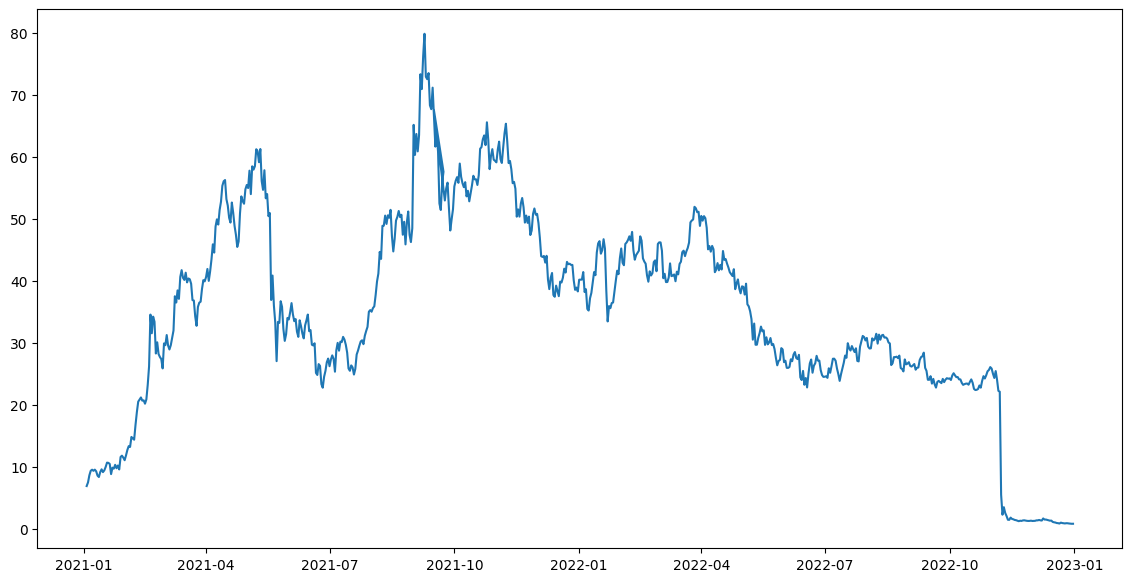

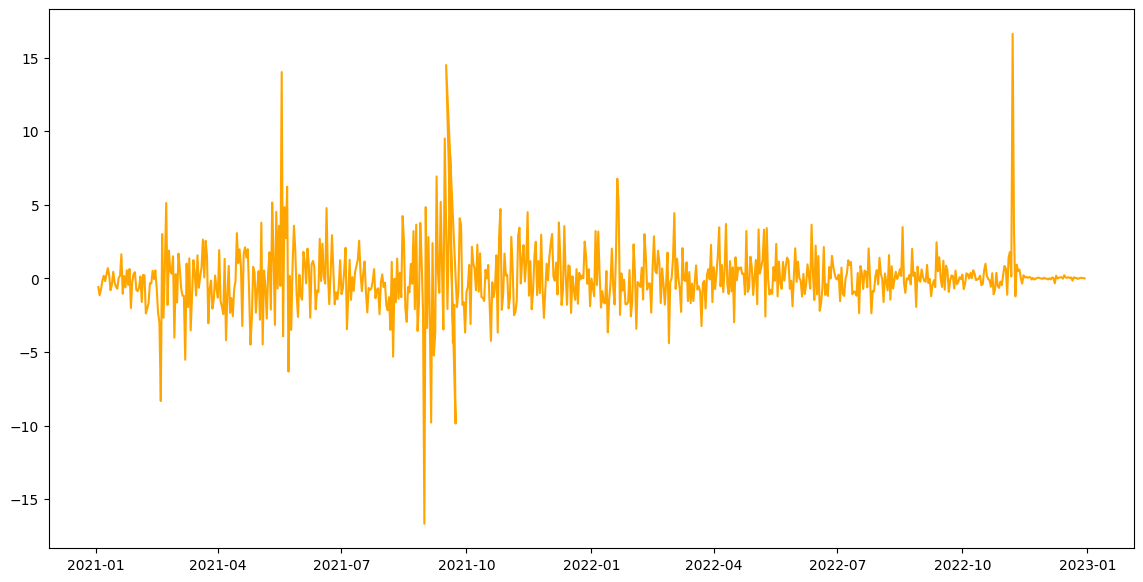

In [49]:
import matplotlib.pyplot as plt
#this part fixes timestamp data into just the date
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['date'] = df['timestamp'].dt.date


# daily closing price
plt.figure(figsize=(14,7))
plt.plot(df['date'], df['close'], label='Daily Closing Price')

# daily gains/losses
plt.figure(figsize=(14,7))
plt.plot(df['date'], df['close_change'], label='Daily Gains/Losses', color='orange')


Combine the two plots from above into a single plot, displaying both together. Your plot should have two Y-axis scales, should differentiate the two values by color, and should include a legend.

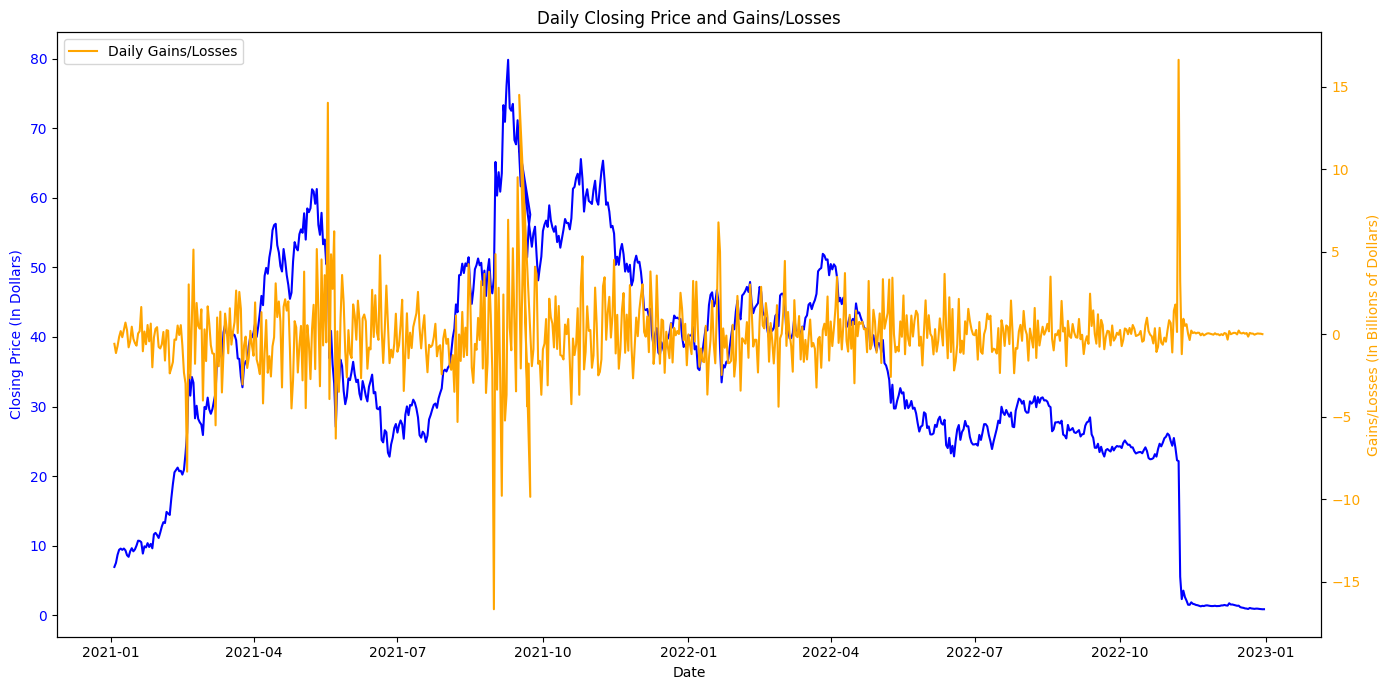

In [55]:
# combined plot
fig, ax1 = plt.subplots(figsize=(14,7))

ax1.set_xlabel('Date')
ax1.set_ylabel('Closing Price (In Dollars)', color='blue')
ax1.plot(df['date'], df['close'], label='Daily Closing Price', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.set_ylabel('Gains/Losses (In Billions of Dollars)', color='orange')
ax2.plot(df['date'], df['close_change'], label='Daily Gains/Losses', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

plt.title('Daily Closing Price and Gains/Losses')
fig.tight_layout()
plt.legend()
plt.show()